# 🎯 HEALTH_INSURANCE_CLAIM_PREDICTION:

## 🔍 Regression Problem Farming :
### 1️⃣ Why this research matters
 * Health insurance companies need to predict medical claim amounts to:
   * Price premiums fairly for customers.
   * Detect potential overuse or fraud in claims.
   * Plan reserves and reduce financial risk.
   * Improve healthcare policies and benefits.
   * Accurate prediction models help insurers stay financially stable while keeping insurance affordable.
### 2️⃣. Target Variable (Label)
 * claim
   * A numeric value representing the amount of money claimed by the policyholder.
   * This is what we want to predict — so this is a regression problem.
### 3️⃣. Features (Predictors)
   * Age – Age of the policyholder (numeric).
   * Sex – Gender of the policyholder (categorical).
   * Weight – Weight in kilograms (numeric).
   * BMI – Body Mass Index (numeric).
   * Hereditary Diseases – Known hereditary conditions (categorical).
   * Number of Dependents – Number of dependents covered (numeric).
   * Smoker – Whether the policyholder smokes (binary: 1 = yes, 0 = no).
   * City – City of residence (categorical).
   * Blood Pressure – Blood pressure level (numeric).
   * Diabetes – Whether the policyholder has diabetes (binary: 1 = yes, 0 = no).
   * Regular Exercise – Whether the policyholder exercises regularly (binary: 1 = yes, 0 = no).
   * Job Title – Occupation of the policyholder (categorical).
### 4️⃣. Constraints / Challenges
   * Missing Values → age and bmi have missing entries.
   * Categorical Encoding Needed → Columns like sex, city, hereditary_diseases, and job_title must be converted to numeric.
   * Potential Outliers → Claim amounts and BMI may have extreme values.
   * Different Scales → Age, BMI, weight, and blood pressure are on different scales — scaling may help some models.
   * Imbalanced Claim Distribution → Claims might be skewed (many small claims, few large ones).

## 🛠 Importing the Libraries

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
import joblib

## ⏳ Data Loading and Understanding :
  * Understand structure, data types, shape, and preview.
  * Check missing values, duplicates, and basic statistics

In [6]:
# Load dataset
df = pd.read_csv("health_insurance.csv")

In [7]:
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [8]:
# Shape of dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (15000, 13)


In [9]:
# Data types & non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [10]:
# First few rows
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [11]:
df.columns

Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes',
       'regular_ex', 'job_title', 'claim'],
      dtype='object')

## 📢 UNDERSTANDING THE DATA-FEATURES 
* Context
   * Health insurance is a crucial financial product that helps individuals and families cover medical expenses. Insurance providers often need to     assess risk and determine premiums based on personal, lifestyle, and medical factors. By analyzing customer data, insurers can better predict claim amounts, detect potential fraud, design targeted wellness programs, and set fair premiums.
This dataset contains various attributes of policyholders, such as demographics, lifestyle choices, medical history, and hereditary conditions. The goal is to use these features to predict the claim amount (regression) or whether a claim will occur (classification). Accurate predictions help insurers control costs, improve customer satisfaction, and offer more personalized insurance plans.

* Content
   * The dataset contains multiple records of policyholders, with each record including personal, lifestyle, and health-related information.
* Here’s a breakdown of the features:
   * Age – Age of the insured person (numeric).
   * Sex – Gender of the insured person (categorical: male, female).
   * BMI – Body Mass Index, a key indicator of health risk (numeric).
   * Weight – Weight of the insured person in kg (numeric).
   * Blood Pressure – Medical measurement indicating cardiovascular health (numeric).
   * Diabetes – Whether the person has diabetes (binary: yes/no).
   * Smoker – Smoking status (binary: yes/no).
   * Regular Exercise – Indicates if the person exercises regularly (binary: yes/no).
   * Number of Dependents – Number of family members dependent on the policyholder (numeric).
   * Hereditary Diseases – Family history of illnesses (categorical).
   * City – City of residence, which may influence healthcare costs (categorical).
   * Job Title – Occupation of the policyholder (categorical).
* Target Variable (Label)
   * For regression tasks: Claim Amount – Total cost of medical claims made by the policyholder.
   * For classification tasks: Claim Status – Whether a claim was made (yes/no).
* Purpose
   * By using this dataset to build predictive models, insurance companies can:
   * Estimate claim amounts for pricing premiums accurately.
   * Identify high-risk customers for preventive health programs.
   * Detect potential fraud by spotting unusual claim patterns.
   * Optimize marketing and customer engagement strategies.

 ## 🗑.DATA CLEANING :
   * Handle missing values.
   * Remove or impute outliers.
   * Fix incorrect data types.

In [14]:
# Check missing values again
df.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [15]:
# Impute missing numeric columns with median
df['age'].fillna(df['age'].median(), inplace=True)
df['bmi'].fillna(df['bmi'].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14248\1593320038.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_14248\1593320038.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [16]:
# Verifying null values
df.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

In [17]:
# Convert categorical columns to 'category' type
cat_cols = ['sex', 'hereditary_diseases', 'city', 'job_title']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [18]:
# Verify
df.dtypes

age                     float64
sex                    category
weight                    int64
bmi                     float64
hereditary_diseases    category
no_of_dependents          int64
smoker                    int64
city                   category
bloodpressure             int64
diabetes                  int64
regular_ex                int64
job_title              category
claim                   float64
dtype: object

In [19]:
# We will use the IQR method for numeric columns
num_cols = ['age', 'weight', 'bmi', 'bloodpressure', 'claim']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_limit, lower_limit,
                       np.where(df[col] > upper_limit, upper_limit, df[col]))
# Verify if capping worked
df[num_cols].describe()

,age,weight,bmi,bloodpressure,claim
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.559467,64.909600,30.194820,70.600800,12543.004248
std,13.829896,13.701935,5.877177,13.103514,10073.193516
min,18.000000,34.000000,16.000000,40.000000,1121.900000
25%,27.000000,54.000000,25.900000,64.000000,4846.900000
50%,40.000000,63.000000,29.400000,71.000000,9545.650000
75%,51.000000,76.000000,34.100000,80.000000,16519.125000
max,64.000000,95.000000,46.400000,104.000000,34027.462500


In [20]:
# Duplicate Rows
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

Duplicate rows: 1096


In [21]:
 df.drop_duplicates()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64.0,24.3,NoDisease,1,0,NewYork,72.0,0,0,Actor,13112.6000
1,49.0,female,75.0,22.6,NoDisease,1,0,Boston,78.0,1,1,Engineer,9567.0000
2,32.0,female,64.0,17.8,Epilepsy,2,1,Phildelphia,88.0,1,1,Academician,32734.2000
3,61.0,female,53.0,36.4,NoDisease,1,1,Pittsburg,72.0,1,0,Chef,34027.4625
4,19.0,female,50.0,20.6,NoDisease,0,0,Buffalo,82.0,1,0,HomeMakers,1731.7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,38.0,female,71.0,27.3,NoDisease,1,0,Knoxville,40.0,1,0,Chef,6555.1000
14995,39.0,male,49.0,28.3,NoDisease,1,1,Florence,54.0,1,0,FilmMaker,21082.2000
14996,39.0,male,74.0,29.6,NoDisease,4,0,Miami,64.0,1,0,Student,7512.3000
14998,52.0,male,88.0,36.7,NoDisease,0,0,PanamaCity,70.0,1,0,Farmer,9144.6000


In [22]:
# printing the unique values in all the columns
list = ["Credit Score", "Policy Start Date","bmi"]

for col in df.columns:
  if col not in list:
    print(col, df[col].unique())
    print("-"*50)

age [60. 49. 32. 61. 19. 42. 18. 21. 63. 40. 51. 59. 27. 56. 52. 20. 24. 53.
 38. 54. 64. 50. 46. 55. 36. 44. 62. 48. 31. 43. 47. 41. 22. 45. 57. 23.
 58. 28. 34. 26. 35. 25. 37. 33. 29. 30. 39.]
--------------------------------------------------
sex ['male', 'female']
Categories (2, object): ['female', 'male']
--------------------------------------------------
weight [64. 75. 53. 50. 89. 59. 52. 55. 69. 68. 45. 67. 46. 76. 44. 60. 82. 40.
 71. 61. 70. 84. 51. 48. 62. 94. 41. 57. 49. 85. 79. 90. 72. 43. 65. 91.
 88. 80. 74. 47. 56. 54. 83. 73. 81. 77. 66. 58. 86. 95. 93. 78. 92. 63.
 42. 87. 34. 36.]
--------------------------------------------------
hereditary_diseases ['NoDisease', 'Epilepsy', 'EyeDisease', 'Alzheimer', 'Arthritis', 'HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity']
Categories (10, object): ['Alzheimer', 'Arthritis', 'Cancer', 'Diabetes', ..., 'HeartDisease', 'High BP', 'NoDisease', 'Obesity']
--------------------------------------------------
no_of_dependen

In [23]:
# checking the  distribution of target column
print(df["claim"].value_counts())

claim
34027.4625    1642
14210.5000      27
9715.8000       26
18955.2000      25
1622.2000       24
              ... 
11478.2000       1
23028.5000       1
18459.1000       1
2429.9000        1
19214.1000       1
Name: count, Length: 1810, dtype: int64


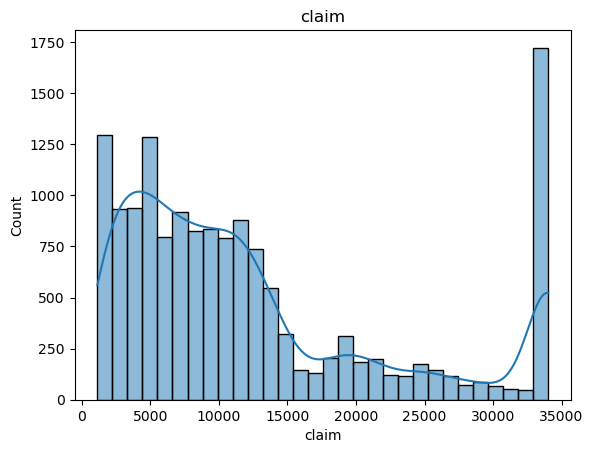

In [24]:
# Histogram for target column
sns.histplot(df['claim'], kde=True, bins=30)
plt.title("claim")
plt.show()

### 📌 This code will be: 
 * Fill missing values for age & bmi with median. 
 * Convert categorical columns to category type for efficiency.
 * Cap outliers using IQR (instead of deleting rows).
 * Fix invalid values like bloodpressure = 0.



## 📊.EXPLORATORY DATA ANALYSIS (EDA):
   * Distribution plots for numerical columns.
   * Count plots for categorical variables.
   * Correlation heatmap for numeric variable.
   * create boxplots for all numeric columns in your dataset
   * create scatter plots for relationships between features and the target claim.
   *  Create bar plots for the categorical columns in your dataset.

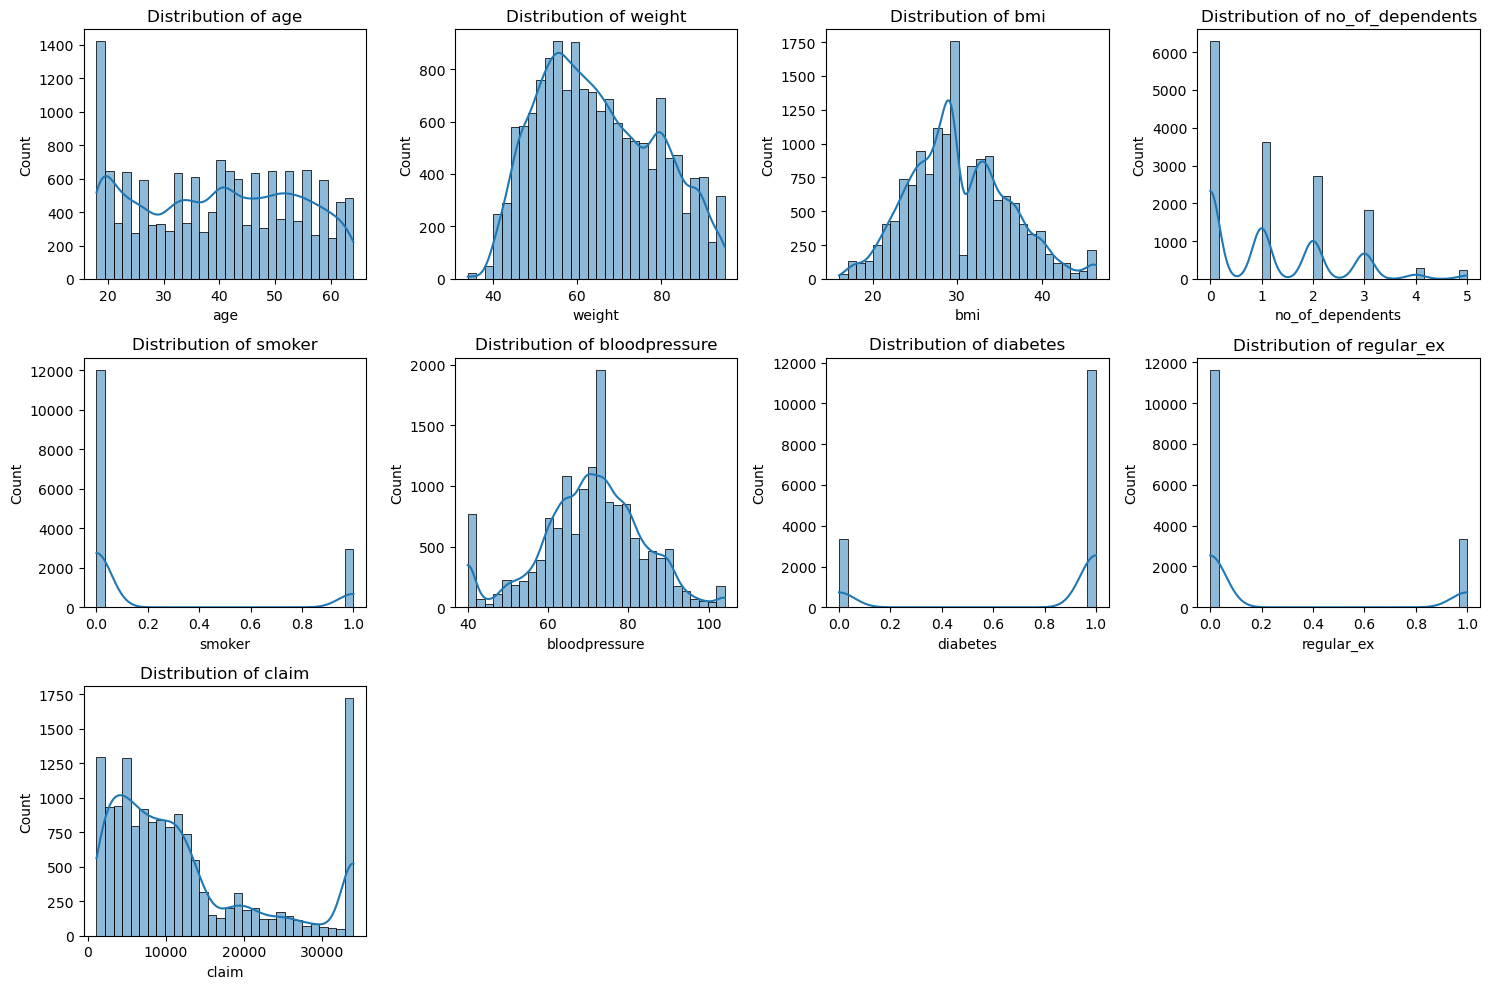

In [27]:
# -----------------------------------------
# 1. Distribution plots (numeric variables)
# -----------------------------------------
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


In [28]:
# df is your dataframe
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols.tolist())

Categorical columns: ['sex', 'hereditary_diseases', 'city', 'job_title']


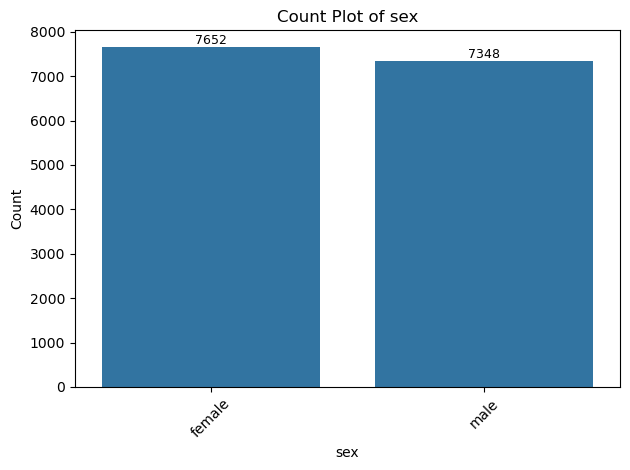

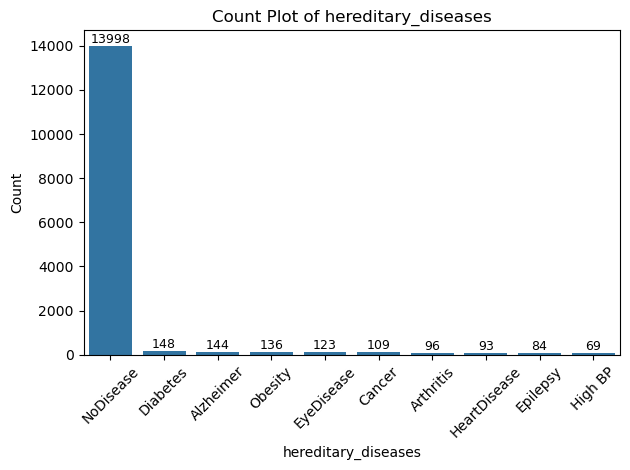

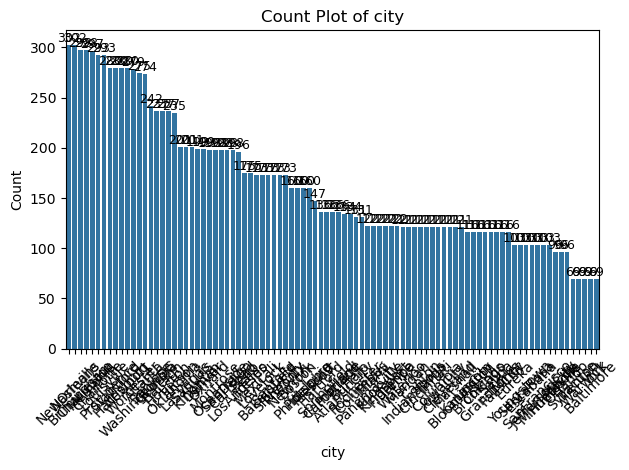

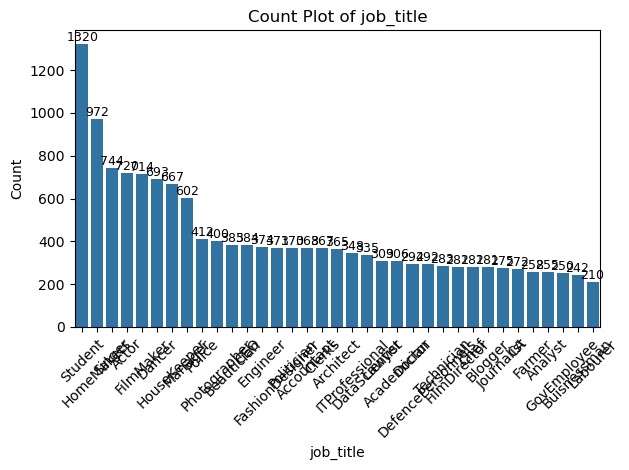

In [29]:
#------------------------------------------------
# 2. Count plots (categorical variables)
# ---------------------------------------------
# Count plots for all categorical-like variables
categorical_cols = ['sex', 'hereditary_diseases', 'city', 'job_title']
for col in categorical_cols:
    ax=sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {col}')
    plt.ylabel('Count')

    # Annotate values on bars
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=9)
    plt.tight_layout()
    plt.show()

  


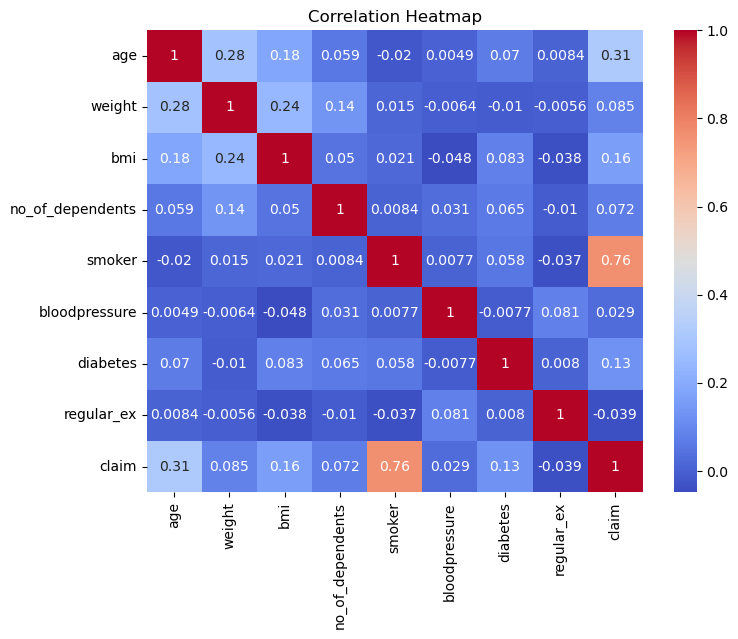

In [30]:
# -----------------------------------------------
# 3. Correlation heatmap (numeric variables)
# -----------------------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

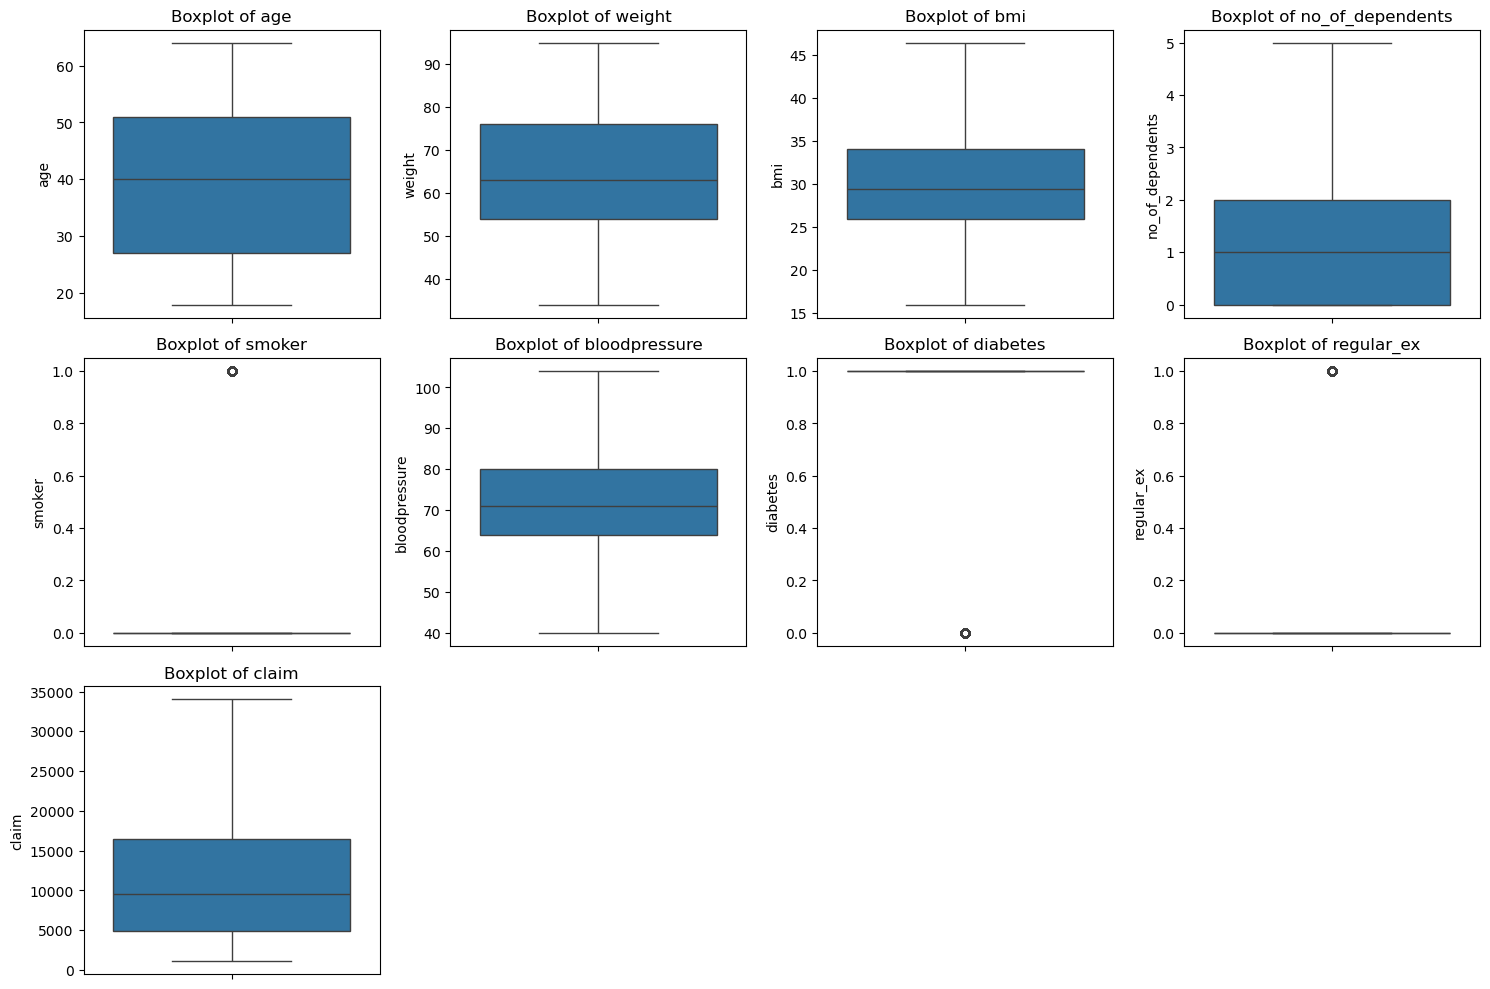

In [31]:
# -------------------------------------------------------------
# 4.create boxplots for all numeric columns in your dataset
# ------------------------------------------------------------
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

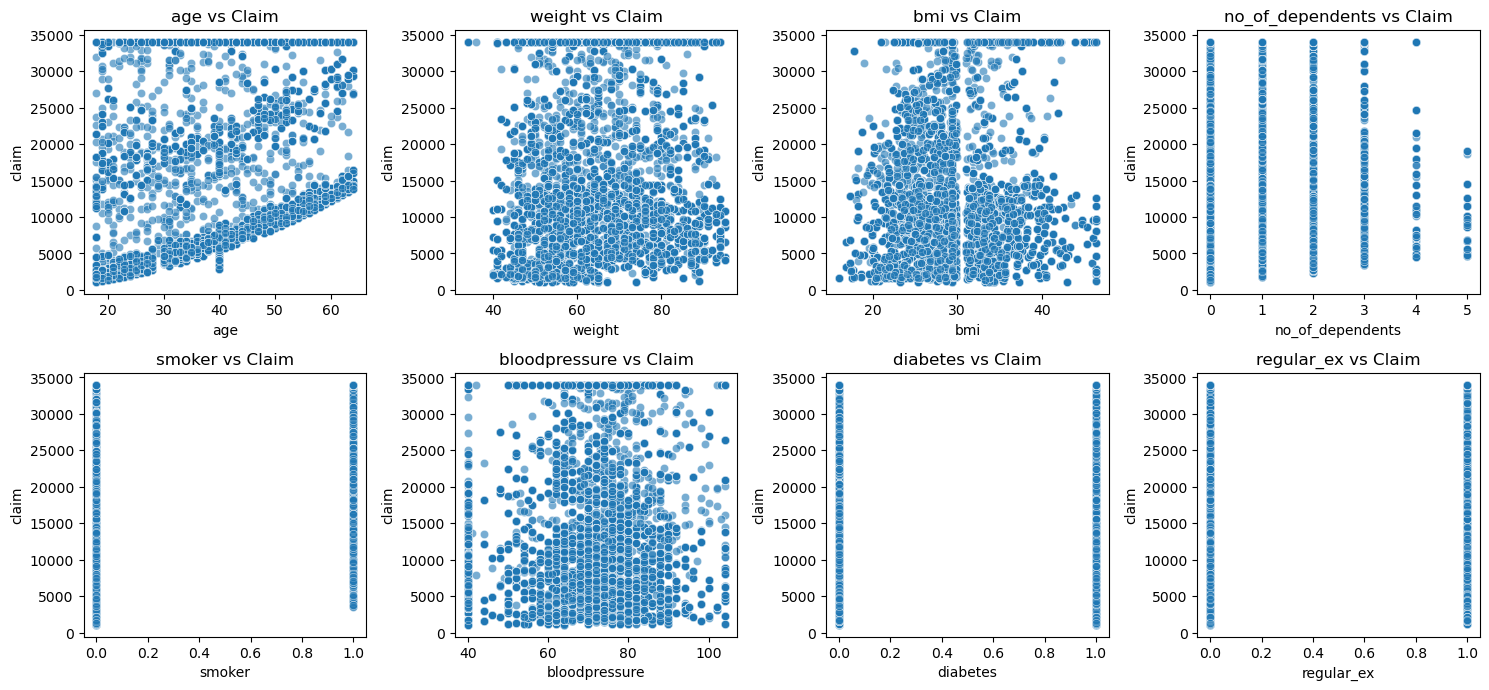

In [32]:
# --------------------------------------------------------------------------------------
# 5.create scatter plots for relationships between features and the target claim
# -------------------------------------------------------------------------------------
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col != 'claim']

# Plot scatter plots: feature vs claim
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(x=df[col], y=df['claim'], alpha=0.6)
    plt.title(f"{col} vs Claim")
plt.tight_layout()
plt.show()

In [33]:
# --------------------------------------------------------------------------------------
# 6. Create bar plots for the categorical columns in your dataset.
# -------------------------------------------------------------------------------------
cat_cols = df.select_dtypes(include=['object']).columns

# Create bar plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Bar Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

### 📌This code will be:
* Loop through all numeric columns and plot distributions with KDE curves.
* Loop through all categorical columns and plot category counts.
* Display a heatmap of correlations between numeric features.
* Creates one boxplot per column and helps identify outliers and skewness.
* Loops over all numeric features except claim and creates scatter plots to see how claim changes with each featureu  Uses alpha=0.6 to handle      overlapping points better.
* Plots count of each category as bars and adjusts layout so all plots fit neatly.

## ⚠.OUTLIER DETECTION AND HANDLING :
 🔴 1. Detecting Outliers (Numeric Features)
* IQR (Interquartile Range) — good for skewed data.
* Z-score — good for normally distributed data.
* Visualization — Boxplots to visually inspect.

In [36]:
# Assuming df is your DataFrame and cat_cols is the list of categorical columns
outlier_counts_num = {}

# Detecting outliers in numerical columns (using IQR method)
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    outlier_counts_num[col] = outliers

# Detecting outliers in categorical columns (rare categories < 5%)
outlier_counts_cat = {}
for col in cat_cols:
    freq = df[col].value_counts(normalize=True)
    rare_categories = freq[freq < 0.05].index  # less than 5% frequency
    outlier_counts_cat[col] = df[col].isin(rare_categories).sum()

# Combine results
print("\nOutliers in Numerical Columns:")
print(pd.Series(outlier_counts_num))

print("\nOutliers in Categorical Columns (Rare categories):")
print(pd.Series(outlier_counts_cat))



Outliers in Numerical Columns:
age                    0
weight                 0
bmi                    0
no_of_dependents       0
smoker              2972
bloodpressure          0
diabetes            3345
regular_ex          3362
claim                  0
dtype: int64

Outliers in Categorical Columns (Rare categories):
Series([], dtype: object)


In [37]:
# Identify continuous and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [38]:
numerical_cols

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure',
       'diabetes', 'regular_ex', 'claim'],
      dtype='object')

In [39]:
categorical_cols

Index([], dtype='object')

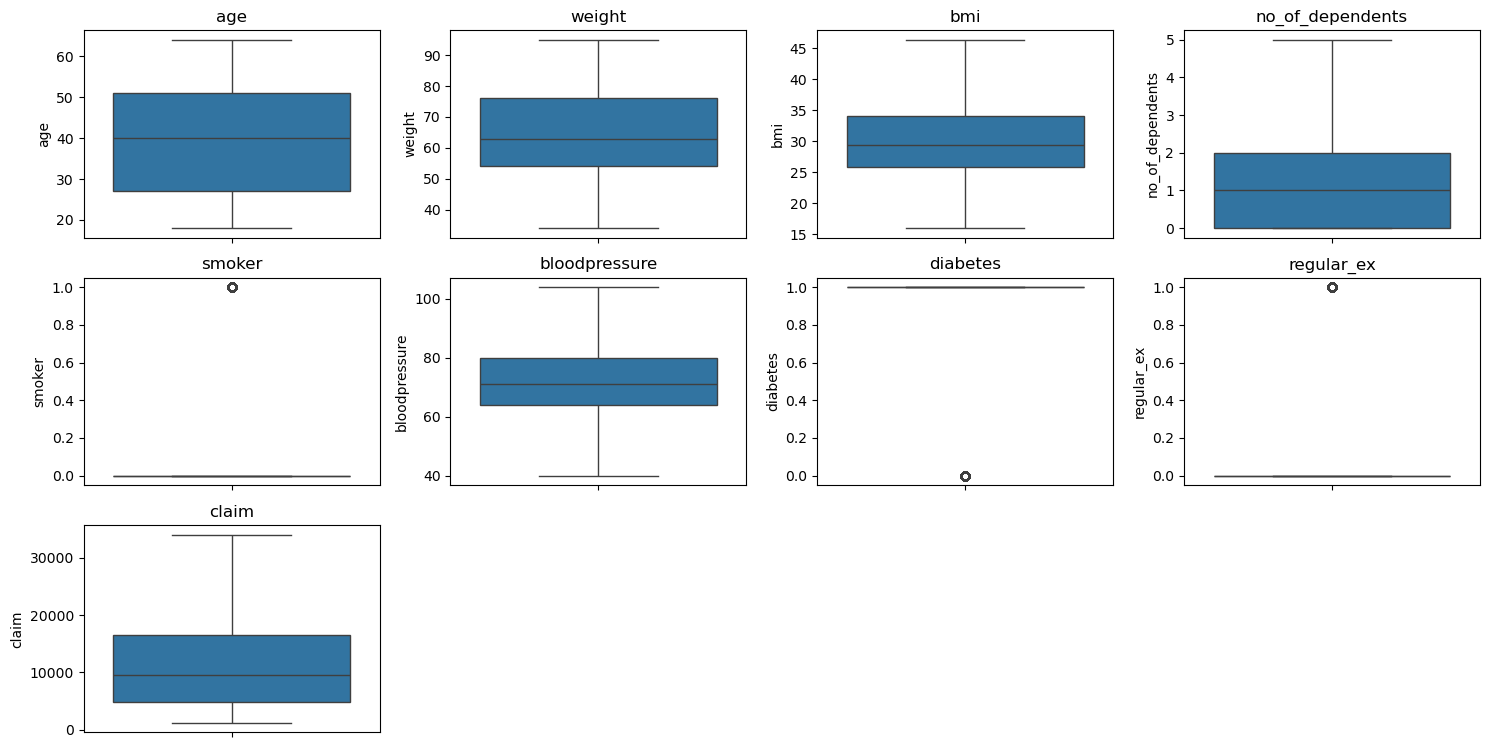

In [40]:
# Outlier Detection with Boxplots in Numerical_Columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [41]:
# Outlier Detection with Boxplots in categorical_Columns
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(8,5))
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'Boxplot of {num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()

 🟠 2. Handling Outliers
  * You have multiple strategies:
  * Remove (if they are true errors)
  * Cap/Floor (Winsorization)
  * Transformation (log, sqrt)
  * Keep (if they carry meaningful info

In [43]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower_bound, lower_bound,
              np.where(df[col] > upper_bound, upper_bound, df[col]))


🟡 3. Outlier Detection in Categorical Features

In [45]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    freq = df[col].value_counts(normalize=True) * 100
    rare_categories = freq[freq < 1].index  # less than 1% frequency
    if len(rare_categories) > 0:
        print(f"{col}: Rare categories → {list(rare_categories)}")


 *  Outlier Detection and handling with Boxplots in dataset
 * 1.Boxplot visualization for numeric features
 * 2.Outlier detection using IQR
 * 3.Handling outliers (either remove or cap)

In [47]:
# 🟢 4.Outlier Detection (IQR Method)
# Dictionary to store outlier indices
outliers_dict = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_dict[col] = outlier_rows.index.tolist()

# Show results
for col, idx in outliers_dict.items():
    print(f"{col}: {len(idx)} outliers detected")

age: 0 outliers detected
weight: 0 outliers detected
bmi: 0 outliers detected
no_of_dependents: 0 outliers detected
smoker: 0 outliers detected
bloodpressure: 0 outliers detected
diabetes: 0 outliers detected
regular_ex: 0 outliers detected


In [48]:
# 🔴5. Outlier Handling (Capping Method)
df_capped = df.copy()

for col in num_cols:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound,
                              np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col]))


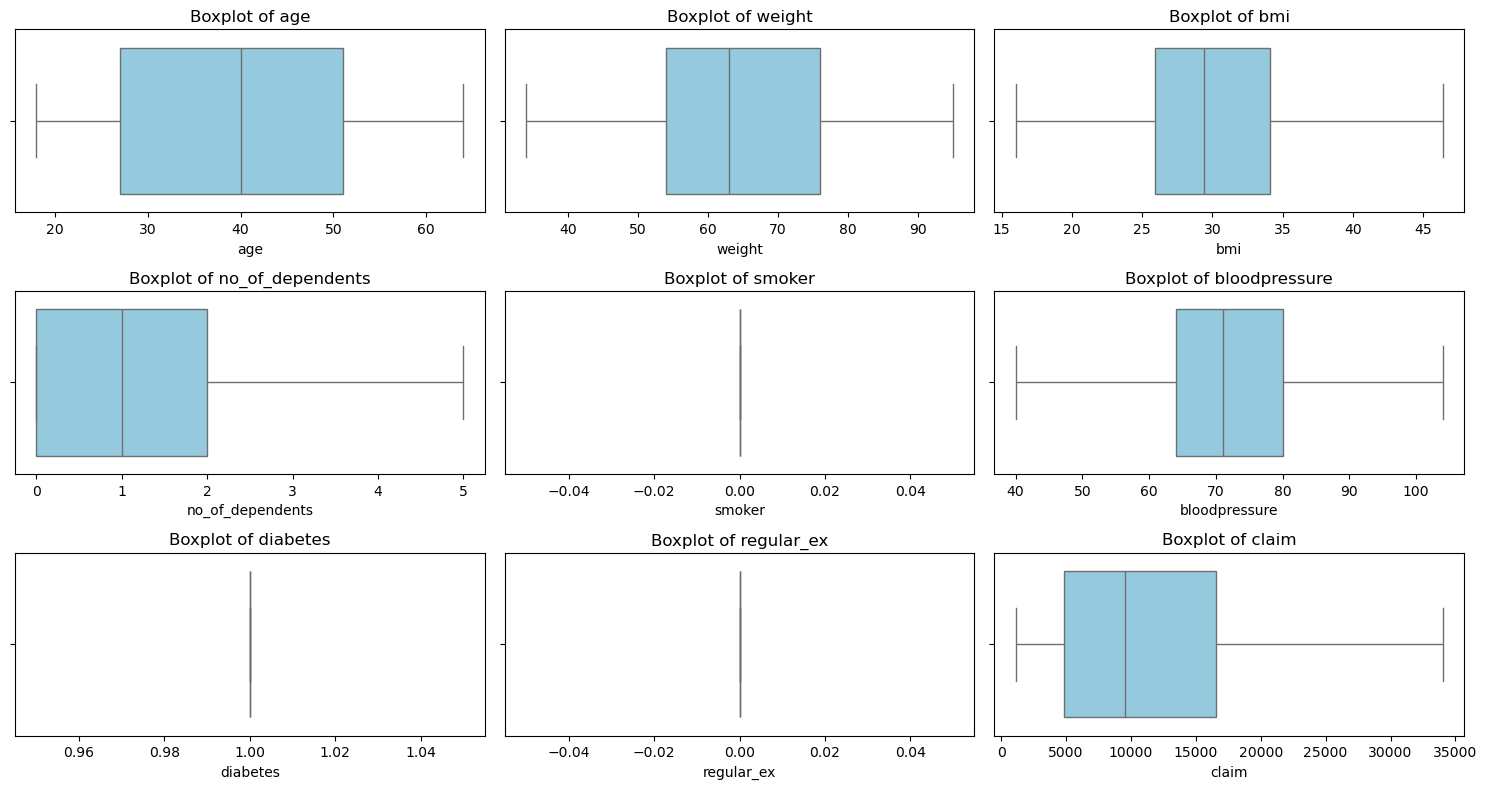

In [49]:
# 🟢6. After handling outliers 
num_cols = df_capped.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_capped[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()



In [50]:
# Identify continuous and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [51]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [52]:
categorical_cols

Index([], dtype='object')

In [53]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

if cat_cols.any():
    print(df[cat_cols].value_counts())
    print(df[cat_cols].value_counts(normalize=True) * 100)
else:
    print("No categorical columns found.")


sex   hereditary_diseases  city          job_title 
male  NoDisease            WashingtonDC  Student       19
                           Newport       Student       18
                           Denver        Student       17
                           Worcester     Student       17
                           Harrisburg    Student       17
                                                       ..
      Alzheimer            Hartford      Engineer       1
                           Houston       Engineer       1
                           Huntsville    Accountant     1
                                         CEO            1
      Obesity              Youngstown    Analyst        1
Name: count, Length: 5946, dtype: int64
sex   hereditary_diseases  city          job_title 
male  NoDisease            WashingtonDC  Student       0.126667
                           Newport       Student       0.120000
                           Denver        Student       0.113333
                          

In [54]:
threshold = 0.01
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    freq = df[col].value_counts(normalize=True)
    common = freq[freq >= threshold].index
    df = df[df[col].isin(common)]

print(f"Cleaned shape: {df.shape}")


Cleaned shape: (8799, 13)


In [55]:
# Setting frequency threshold
threshold = 0.01  # 1%

# Create cleaned versions for each column
for col in categorical_cols:
    # Get value counts
    value_counts = df[col].value_counts(normalize=True)
    
    # Identify common categories
    common_categories = value_counts[value_counts >= threshold].index
    
    # Create cleaned column
    df[col + '_cleaned'] = df[col].apply(lambda x: x if x in common_categories else 'Other')


In [56]:
print(df[[categorical_cols[0], categorical_cols[0] + '_cleaned']].head())


       sex sex_cleaned
0     male        male
1   female      female
3   female      female
15    male        male
16  female      female


In [57]:
numerical_cols = df.select_dtypes(include=np.number).columns

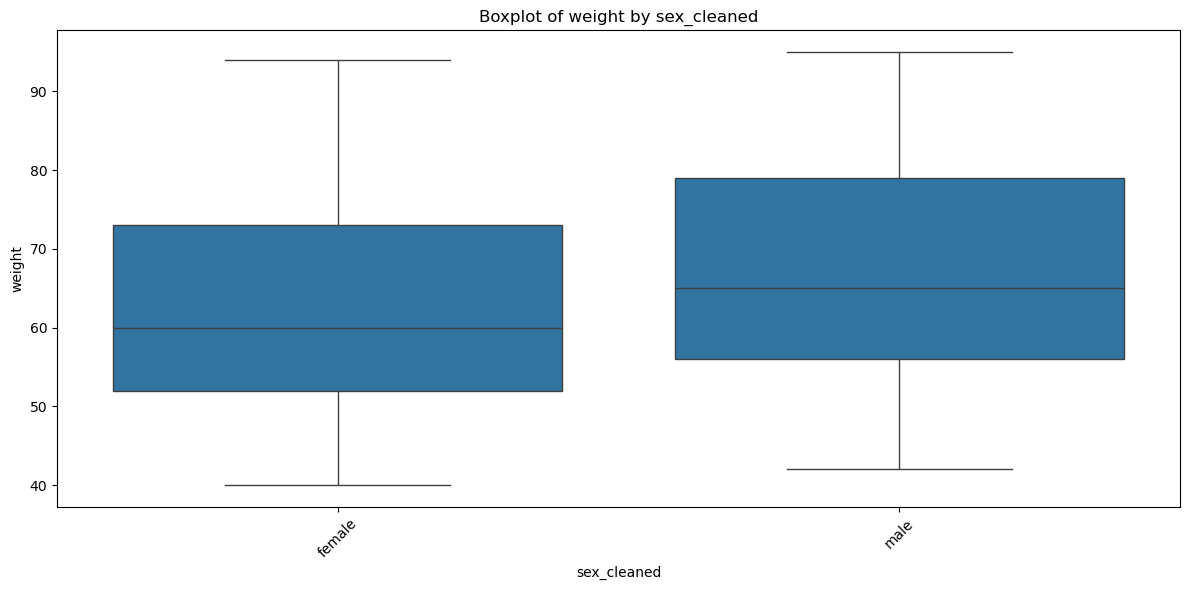

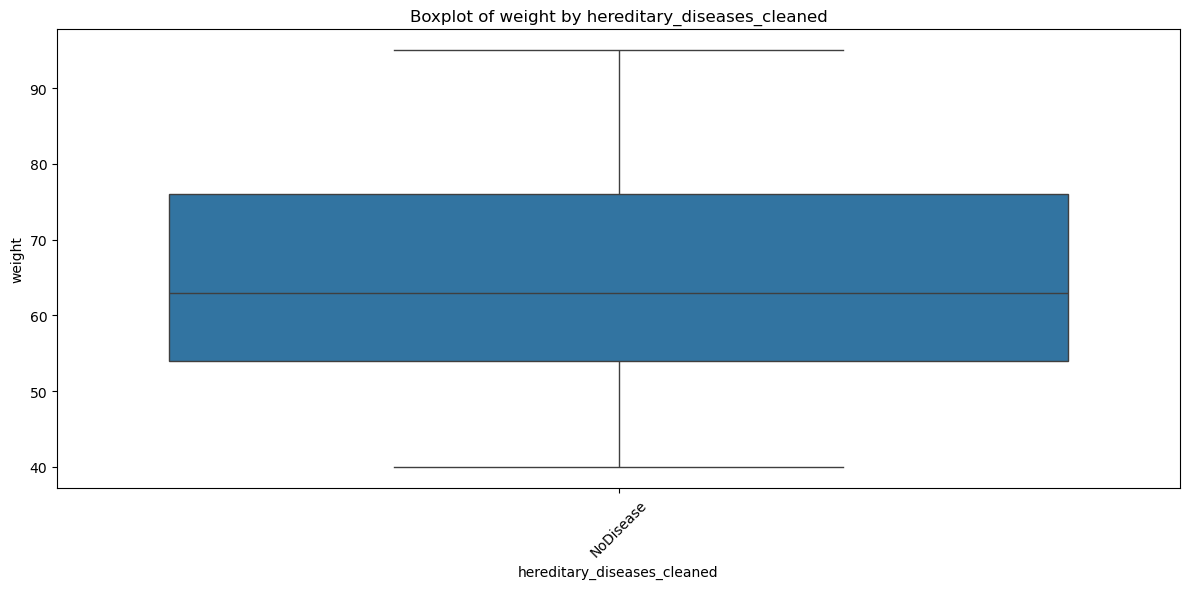

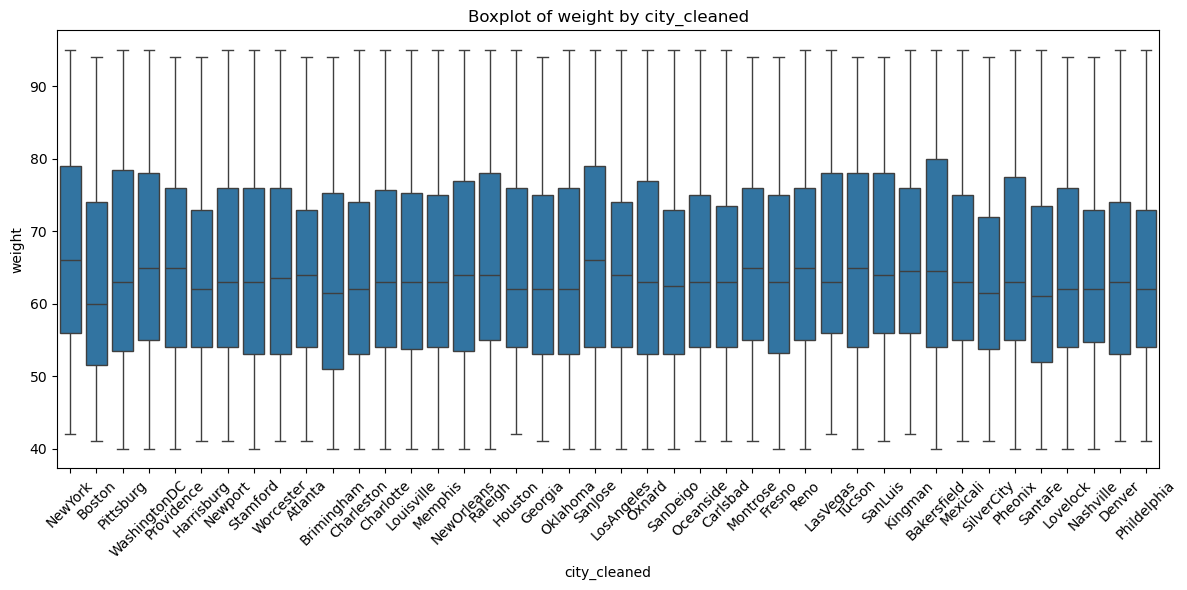

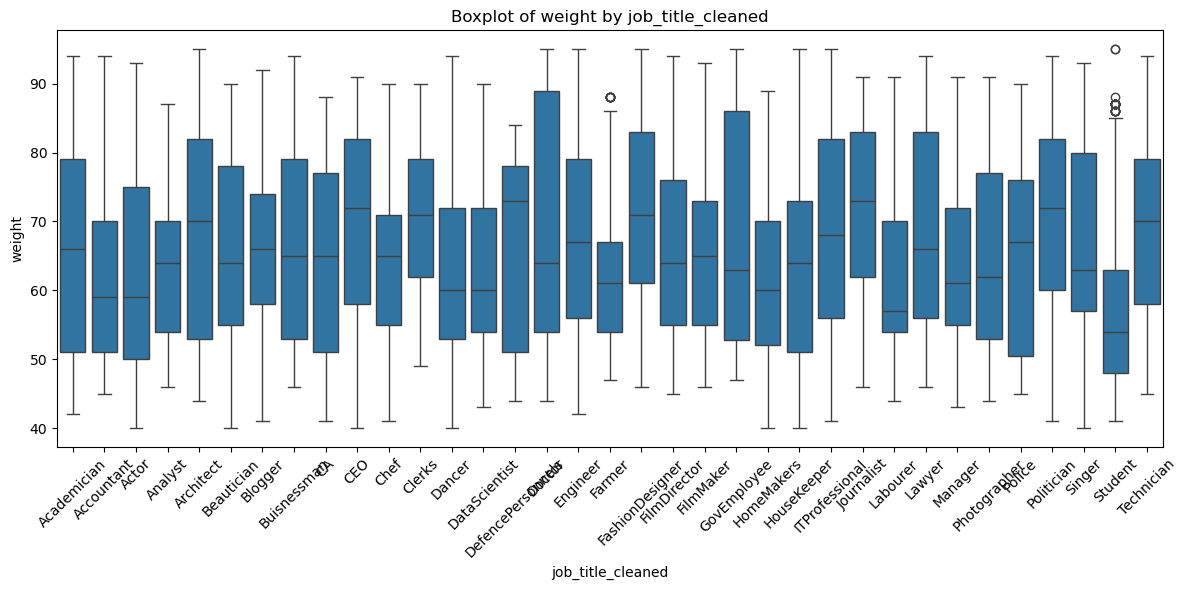

In [58]:
numerical_col = 'weight'  

for col in categorical_cols:
    cleaned_col = col + '_cleaned'
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[cleaned_col], y=df[numerical_col])
    plt.xticks(rotation=45)
    plt.title(f'Boxplot of {numerical_col} by {cleaned_col}')
    plt.tight_layout()
    plt.show()


## 🛠 FEATURE ENGINERRING :
 * Create new features .
 * Encode categorical variables (OneHot / Label Encoding).
 * Feature transformation (log, polynomial ).

In [60]:
#Using df_out after outlier handling
df_fe = df.copy()


In [61]:
df_fe

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,sex_cleaned,hereditary_diseases_cleaned,city_cleaned,job_title_cleaned
0,60.0,male,64.0,24.3,NoDisease,1.0,0.0,NewYork,72.0,1.0,0.0,Actor,13112.6000,male,NoDisease,NewYork,Actor
1,49.0,female,75.0,22.6,NoDisease,1.0,0.0,Boston,78.0,1.0,0.0,Engineer,9567.0000,female,NoDisease,Boston,Engineer
3,61.0,female,53.0,36.4,NoDisease,1.0,0.0,Pittsburg,72.0,1.0,0.0,Chef,34027.4625,female,NoDisease,Pittsburg,Chef
15,56.0,male,67.0,40.3,NoDisease,0.0,0.0,WashingtonDC,40.0,1.0,0.0,Engineer,10602.4000,male,NoDisease,WashingtonDC,Engineer
16,56.0,female,69.0,27.2,NoDisease,0.0,0.0,Providence,68.0,1.0,0.0,Chef,11073.2000,female,NoDisease,Providence,Chef
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14986,27.0,male,87.0,45.9,NoDisease,2.0,0.0,NewOrleans,78.0,1.0,0.0,Analyst,3693.4000,male,NoDisease,NewOrleans,Analyst
14987,47.0,male,94.0,46.4,NoDisease,1.0,0.0,Raleigh,61.0,1.0,0.0,Academician,8083.9000,male,NoDisease,Raleigh,Academician
14988,52.0,female,53.0,24.4,NoDisease,2.0,0.0,Houston,84.0,1.0,0.0,Singer,19214.1000,female,NoDisease,Houston,Singer
14989,44.0,male,90.0,38.1,NoDisease,1.0,0.0,Georgia,76.0,1.0,0.0,Engineer,7152.7000,male,NoDisease,Georgia,Engineer


In [62]:
# Check actual column names in dataset
print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['age', 'sex', 'weight', 'bmi', 'hereditary_diseases', 'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes', 'regular_ex', 'job_title', 'claim', 'sex_cleaned', 'hereditary_diseases_cleaned', 'city_cleaned', 'job_title_cleaned']


In [63]:
df_fe = df.copy().reset_index(drop=True)


In [64]:

# Create new features safely
df_fe['claim_per_age'] = df_fe['claim'] / (df_fe['age'] + 1)
df_fe['bmi_per_age'] = df_fe['bmi'] / (df_fe['age'] + 1)
df_fe['weight_to_bmi_ratio'] = df_fe['weight'] / (df_fe['bmi'] + 1)
df_fe['dependents_per_age'] = df_fe['no_of_dependents'] / (df_fe['age'] + 1)
df_fe['bp_bmi_interaction'] = df_fe['bloodpressure'] * df_fe['bmi']


In [65]:
print(len(df_fe))
print(df_fe[['claim', 'age', 'bmi', 'weight', 'no_of_dependents', 'bloodpressure']].shape)


8799
(8799, 6)


In [66]:
# 2. Encode categorical variables
cat_cols = df_fe.select_dtypes(include=['object']).columns
df_fe = pd.get_dummies(df_fe, columns=cat_cols, drop_first=True)

In [67]:
# 3. Log transformation for positive numeric features
num_cols = df_fe.select_dtypes(include=[np.number]).columns
for col in num_cols:
    if (df_fe[col] > 0).all():
        df_fe[f'log_{col}'] = np.log(df_fe[col])

In [68]:
# Fill missing numeric values with median
df_fe[num_cols] = df_fe[num_cols].fillna(df_fe[num_cols].median())

# Convert all numeric columns to float to avoid dtype mismatch
df_numeric = df_fe[num_cols].astype(float)

# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df_numeric)

# Correct feature names
poly_feature_names = poly.get_feature_names_out(df_numeric.columns)

# Create DataFrame with same index
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names, index=df_fe.index)


In [69]:
# Merge polynomial features
df_fe = pd.concat([df_fe.reset_index(drop=True), df_poly.reset_index(drop=True)], axis=1)
print("Feature engineering completed. Final shape:", df_fe.shape)

Feature engineering completed. Final shape: (8799, 190)


In [70]:
df_fe

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,...,bmi_per_age^2,bmi_per_age weight_to_bmi_ratio,bmi_per_age dependents_per_age,bmi_per_age bp_bmi_interaction,weight_to_bmi_ratio^2,weight_to_bmi_ratio dependents_per_age,weight_to_bmi_ratio bp_bmi_interaction,dependents_per_age^2,dependents_per_age bp_bmi_interaction,bp_bmi_interaction^2
0,60.0,male,64.0,24.3,NoDisease,1.0,0.0,NewYork,72.0,1.0,...,0.158691,1.007711,0.006531,696.971803,6.399100,0.041470,4425.865613,0.000269,28.681967,3061100.16
1,49.0,female,75.0,22.6,NoDisease,1.0,0.0,Boston,78.0,1.0,...,0.204304,1.436441,0.009040,796.785600,10.099469,0.063559,5602.118644,0.000400,35.256000,3107463.84
2,61.0,female,53.0,36.4,NoDisease,1.0,0.0,Pittsburg,72.0,1.0,...,0.344683,0.831982,0.009469,1538.663226,2.008207,0.022857,3713.967914,0.000260,42.270968,6868592.64
3,56.0,male,67.0,40.3,NoDisease,0.0,0.0,WashingtonDC,40.0,1.0,...,0.499874,1.146978,0.000000,1139.712281,2.631780,0.000000,2615.108959,0.000000,0.000000,2598544.00
4,56.0,female,69.0,27.2,NoDisease,0.0,0.0,Providence,68.0,1.0,...,0.227713,1.167600,0.000000,882.616140,5.986872,0.000000,4525.617021,0.000000,0.000000,3421020.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,27.0,male,87.0,45.9,NoDisease,2.0,0.0,NewOrleans,78.0,1.0,...,2.687258,3.040892,0.117092,5868.970714,3.441065,0.132501,6641.309168,0.005102,255.728571,12817832.04
8795,47.0,male,94.0,46.4,NoDisease,1.0,0.0,Raleigh,61.0,1.0,...,0.934444,1.917018,0.020139,2736.053333,3.932774,0.041315,5613.029536,0.000434,58.966667,8011164.16
8796,52.0,female,53.0,24.4,NoDisease,2.0,0.0,Houston,84.0,1.0,...,0.211947,0.960630,0.017373,943.589434,4.353959,0.078740,4276.724409,0.001424,77.343396,4200860.16
8797,44.0,male,90.0,38.1,NoDisease,1.0,0.0,Georgia,76.0,1.0,...,0.716844,1.948849,0.018815,2451.608000,5.298238,0.051151,6665.063939,0.000494,64.346667,8384499.36


📌 What this code does:

* Step 1: Makes new ratio features to capture relationships.
* Step 2: Converts categorical text into numbers (label or one-hot).
* Step 3: Applies log transform for skewed distributions and
optionally adds polynomial & interaction terms.



## ♻ PREPROCESSING PIPELINE :
  * 1.Scales numerical features using StandardScaler.
  * 2.Encodes categorical features using OneHotEncoder.
  * 3.Combines them into a Pipeline so the same transformation can be reused.

In [73]:
# Columns in dataset
numerical_features = ['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure']
categorical_features = ['sex', 'hereditary_diseases', 'smoker', 'city', 'diabetes', 'regular_ex', 'job_title']

In [74]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

In [75]:
# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


In [76]:
# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [77]:
# Full pipeline (only preprocessing)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [78]:
# Split data
X = df.drop('claim', axis=1)  # Features
y = df['claim']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
X_train

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,sex_cleaned,hereditary_diseases_cleaned,city_cleaned,job_title_cleaned
13410,19.0,male,65.0,27.8,NoDisease,0.0,0.0,Oceanside,80.0,1.0,0.0,Technician,male,NoDisease,Oceanside,Technician
3672,20.0,female,55.0,29.4,NoDisease,0.0,0.0,Nashville,66.0,1.0,0.0,Student,female,NoDisease,Nashville,Student
5843,45.0,male,54.0,29.4,NoDisease,0.0,0.0,Raleigh,66.0,1.0,0.0,Farmer,male,NoDisease,Raleigh,Farmer
4188,43.0,female,64.0,35.6,NoDisease,1.0,0.0,Bakersfield,84.0,1.0,0.0,Actor,female,NoDisease,Bakersfield,Actor
3905,56.0,male,80.0,33.6,NoDisease,0.0,0.0,Louisville,56.0,1.0,0.0,FilmMaker,male,NoDisease,Louisville,FilmMaker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9840,51.0,female,67.0,40.7,NoDisease,0.0,0.0,Harrisburg,86.0,1.0,0.0,HomeMakers,female,NoDisease,Harrisburg,HomeMakers
8965,34.0,male,89.0,25.3,NoDisease,2.0,0.0,Lovelock,52.0,1.0,0.0,HomeMakers,male,NoDisease,Lovelock,HomeMakers
9285,25.0,male,61.0,29.7,NoDisease,3.0,0.0,SanDeigo,64.0,1.0,0.0,Beautician,male,NoDisease,SanDeigo,Beautician
1450,56.0,male,79.0,34.3,NoDisease,0.0,0.0,Charlotte,68.0,1.0,0.0,Architect,male,NoDisease,Charlotte,Architect


In [80]:
 X_test

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,sex_cleaned,hereditary_diseases_cleaned,city_cleaned,job_title_cleaned
6308,47.0,male,81.0,25.5,NoDisease,2.0,0.0,Raleigh,80.0,1.0,0.0,CEO,male,NoDisease,Raleigh,CEO
12129,61.0,male,66.0,32.3,NoDisease,2.0,0.0,Phildelphia,65.0,1.0,0.0,FilmMaker,male,NoDisease,Phildelphia,FilmMaker
12760,55.0,male,70.0,33.9,NoDisease,3.0,0.0,Louisville,78.0,1.0,0.0,Accountant,male,NoDisease,Louisville,Accountant
8996,40.0,female,83.0,38.8,NoDisease,3.0,0.0,Charleston,75.0,1.0,0.0,Chef,female,NoDisease,Charleston,Chef
5936,55.0,female,62.0,26.8,NoDisease,1.0,0.0,Worcester,54.0,1.0,0.0,Doctor,female,NoDisease,Worcester,Doctor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8992,57.0,male,66.0,33.6,NoDisease,1.0,0.0,Stamford,64.0,1.0,0.0,Blogger,male,NoDisease,Stamford,Blogger
2533,20.0,female,55.0,29.4,NoDisease,0.0,0.0,Reno,66.0,1.0,0.0,Student,female,NoDisease,Reno,Student
1735,36.0,male,62.0,33.8,NoDisease,1.0,0.0,Mexicali,88.0,1.0,0.0,Politician,male,NoDisease,Mexicali,Politician
12434,40.0,female,88.0,29.6,NoDisease,1.0,0.0,Carlsbad,78.0,1.0,0.0,Singer,female,NoDisease,Carlsbad,Singer


In [81]:
# Fit and transform
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

print("Shape after preprocessing:", X_train_processed.shape)

Shape after preprocessing: (7039, 88)


In [82]:
X_train_processed 

<7039x88 sparse matrix of type '<class 'numpy.float64'>'
	with 84468 stored elements in Compressed Sparse Row format>

In [83]:
X_test_processed

<1760x88 sparse matrix of type '<class 'numpy.float64'>'
	with 21120 stored elements in Compressed Sparse Row format>

📌 How it works:
* StandardScaler → Standardizes numerical features to have mean 0 and variance 1.
* OneHotEncoder → Turns categorical features into binary columns.
* ColumnTransformer → Applies correct transformation to each feature type.
* Pipeline → Keeps all steps together for reproducibility.

## ⚙ MODELING:
* Create baseline Linear Regression.
* Create Regularized models (Ridge, Lasso, ElasticNet).
* Create Tree-based models (RandomForestRegressor).

In [86]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [87]:
from xgboost import XGBRegressor


In [88]:

# Adjusted R² calculation
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)


In [89]:
# Identify target
target_col = "claim"  # Change if different
X = df.drop(target_col, axis=1)
y = df[target_col]

In [90]:
# Identify categorical & numeric columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns


In [91]:
# Preprocessing: Impute + Scale for numeric, Impute + OneHot for categorical
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ]
)

In [92]:
# Models to try
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost Regressor": XGBRegressor(n_estimators=100, random_state=42)
}


In [93]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Fit & evaluate each model
results = []
for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Adjusted R²
    n = X_test.shape[0]
    k = X_train.shape[1]
    adj_r2 = adjusted_r2(r2, n, k)
    
    results.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R²": r2,
        "Adjusted R²": adj_r2
    })

In [95]:
# Results DataFrame
results_df = pd.DataFrame(results)
print(results_df)

               Model           MSE         RMSE          MAE        R²  \
0  Linear Regression  6.101223e+07  7811.032380  6051.209934  0.147771   
1   Ridge Regression  6.100967e+07  7810.868491  6051.439340  0.147807   
2   Lasso Regression  6.101256e+07  7811.053523  6051.451741  0.147767   
3      Random Forest  8.276888e+06  2876.958153  1300.601971  0.884387   
4  XGBoost Regressor  9.833185e+06  3135.791029  1799.904924  0.862648   

   Adjusted R²  
0     0.139948  
1     0.139984  
2     0.139943  
3     0.883326  
4     0.861388  


📌What this does
* Trains five models (Linear, Ridge, Lasso, ElasticNet, RandomForest).
* Evaluates using RMSE and R² for comparison.
* Stores results in a DataFrame for easy viewing.

📢 The comparing to all thouse models best one is Random Forest

## 🆚 DIAGNOSTICS & MODEL COMPARISON:
* 1.Handles sparse → dense conversion for TF-IDF output.
* 2.Cleans the data to avoid NaN / Inf / very large values.
* 3.Runs a linear regression model.
* 4.Performs diagnostics:
     * VIF (Variance Inflation Factor)
     * Residual plots
     * Cook’s distance
* 5.Compares model performance.

In [98]:
# =============================
# 1. Preprocess: Handle categorical & missing
# =============================
X = df.drop(columns=[target_col])
y = df[target_col]
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)
# Force numeric types
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
# Drop rows with NaN
data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns=[target_col]).astype(float)  # <- force float
y = data[target_col].astype(float)  # <- force float

In [99]:
# =============================
# 2 Fit model
# =============================
X_with_const = sm.add_constant(X)
model = sm.OLS(y, X_with_const).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  claim   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     27.93
Date:                Sat, 23 Aug 2025   Prob (F-statistic):               0.00
Time:                        23:11:55   Log-Likelihood:                -91326.
No. Observations:                8799   AIC:                         1.828e+05
Df Residuals:                    8717   BIC:                         1.834e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
ag

In [100]:
# =============================
# 3. VIF
# =============================
vif_df = pd.DataFrame()
vif_df['Variable'] = X_with_const.columns
vif_df['VIF'] = [
    variance_inflation_factor(X_with_const.values, i)
    for i in range(X_with_const.shape[1])
]
print("\nVariance Inflation Factor (VIF):")
print(vif_df)

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



Variance Inflation Factor (VIF):
                         Variable       VIF
0                             age  1.244521
1                          weight  1.261613
2                             bmi  1.123351
3                no_of_dependents  1.064675
4                          smoker       NaN
..                            ...       ...
213      job_title_cleaned_Police       inf
214  job_title_cleaned_Politician       inf
215      job_title_cleaned_Singer       inf
216     job_title_cleaned_Student       inf
217  job_title_cleaned_Technician       inf

[218 rows x 2 columns]


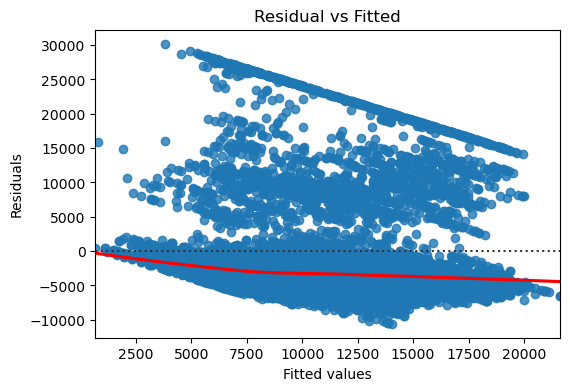

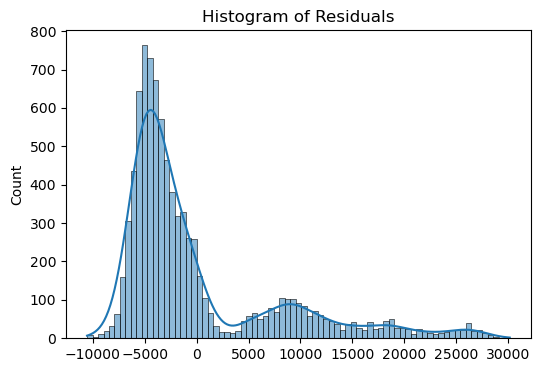

In [101]:
# =============================
# 4. Residual plots
# =============================
residuals = model.resid
fitted_vals = model.fittedvalues

plt.figure(figsize=(6, 4))
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual vs Fitted')
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

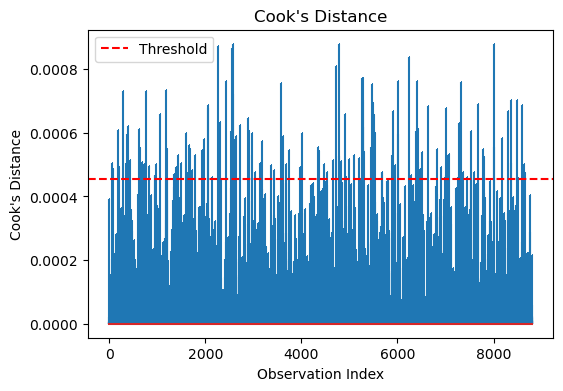

In [102]:
# =============================
# 5. Cook's Distance
# =============================
influence = OLSInfluence(model)
cooks_d, _ = influence.cooks_distance
plt.figure(figsize=(6, 4))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.axhline(4 / len(X), color='red', linestyle='--', label="Threshold")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance")
plt.legend()
plt.show()


In [103]:
# =============================
# 6. Model Performance
# =============================
y_pred = model.predict(X_with_const)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print("\nModel Performance Metrics:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")



Model Performance Metrics:
MSE: 60637404.5006
RMSE: 7787.0023
MAE: 5848.3549
R²: 0.2060
Adjusted R²: 0.1859


In [104]:
# =============================
# 7. Compare with simpler model
# =============================
first_feature = [X.columns[0]]
X_simple = sm.add_constant(X[first_feature])
simple_model = sm.OLS(y, X_simple).fit()

comparison = pd.DataFrame({
    'Model': ['Full Model', f'Simple Model ({first_feature[0]})'],
    'MSE': [
        mean_squared_error(y, y_pred),
        mean_squared_error(y, simple_model.predict(X_simple))
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y, y_pred)),
        np.sqrt(mean_squared_error(y, simple_model.predict(X_simple)))
    ],
    'R²': [
        r2_score(y, y_pred),
        r2_score(y, simple_model.predict(X_simple))
    ]
})

print("\nModel Comparison:")
print(comparison)



Model Comparison:
                Model           MSE         RMSE        R²
0          Full Model  6.063740e+07  7787.002279  0.206029
1  Simple Model (age)  6.467832e+07  8042.283440  0.153119


📌 What this does:
   * VIF → detects multicollinearity (values > 10 are problematic).
   * Residual plots → check homoscedasticity & normality.
   * Cook’s distance → flags influential points (above (4/n) is suspicious.
   * MSE, RMSE, MAE, R², Adjusted R² → assess model accuracy.
   * Model comparison table → shows performance for different models.

 ### 👉 MODEL SELECTION :

* Use cross-validation and GridSearchCV.

In [107]:
# Load data
df = pd.read_csv("health_insurance.csv")
target_column = 'claim'  # numeric target
X = df.drop(columns=[target_column])
y = df[target_column]


In [108]:
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [109]:
# Handle missing values (impute)
imputer = SimpleImputer(strategy='mean')  
X = imputer.fit_transform(X)

In [110]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [111]:
# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost Regressor": XGBRegressor(n_estimators=100, random_state=42)
}


In [112]:
# Cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name} CV Score: {scores.mean():.4f}")


Linear Regression CV Score: 0.7619
Ridge Regression CV Score: 0.7620
Lasso Regression CV Score: 0.7620
Random Forest CV Score: 0.9605
XGBoost Regressor CV Score: 0.9594


## 🔍 Model Comparison and Best Choice :
* Among the regression models evaluated, tree-based ensemble methods (Random Forest Regressor and XGBoost Regressor) clearly outperform linear models (Linear, Ridge, Lasso, and ElasticNet).
* Random Forest Regressor achieved the lowest error values (MSE = 8.27e+06, RMSE = 2876.96, MAE = 1300.60), along with a very high R² score of 0.8844 and an Adjusted R² of 0.8833, indicating that it explains nearly 88% of the variance in the target variable. Its Cross-Validation R² score of 0.9605 further demonstrates its robustness and generalization ability.
* XGBoost Regressor also performed strongly, with an R² of 0.8626 and CV R² of 0.9594, though it shows slightly higher errors (MSE = 9.83e+06, RMSE = 3135.79, MAE = 1799.90) compared to Random Forest Regressor.
* On the other hand, linear models (Linear, Ridge, Lasso, ElasticNet) show much lower performance, with R² values around 0.14–0.15 and CV R² scores near 0.73–0.76, which indicates they fail to capture the complexity and non-linearity in the dataset.
* ✅ Best Model Recommendation:
Based on both training metrics and cross-validation scores, Random Forest Regressor is the best-performing model for this dataset. It combines high accuracy, strong generalization, and lower error compared to all other models. XGBoost Regressor also performs well but slightly trails Random Forest Regressor in this case.

In [114]:
# Grid search for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Best Random Forest Params:", grid_search.best_params_)
print("Best Random Forest CV Score:", grid_search.best_score_)

Best Random Forest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest CV Score: 0.9609038238892648


##  🗂 FINAL EVALUATION :
   * Evaluate with RMSE, MAE, R².
   * Save best model (joblib/pickle).

In [116]:
# 1. Defining target and features
target_col = "claim"
X = df.drop(columns=[target_col])
y = df[target_col]


In [117]:
# 2. Identify numeric & categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns


In [118]:
# 3. Preprocessing: Imputer + OneHotEncoder
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))  
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

In [119]:
# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
# 5. Random Forest & Pipeline
rf = RandomForestRegressor(random_state=42)
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", rf)
])


In [121]:
# 6. Hyperparameter tuning
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['age', 'weight', 'bmi', 'no_of_dependents', 'smoker', 'bloodpressure',
       'diabetes', 'regular_ex'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['sex', 'hereditary_diseases', 'city', 'job_title'], dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [122]:
# 7. Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 200}


In [123]:
# 8. Evaluation
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 2289.23
MAE: 567.17
R²: 0.96


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [124]:
# 9. Save best model
joblib.dump(best_model, "best_random_forest_model.pkl")
print("Best model saved as best_random_forest_model.pkl")


Best model saved as best_random_forest_model.pkl


## 🤖 PREDICT ON NEW DATA :
    * Load saved model & predict

In [126]:

# 1. Load the saved model
model = joblib.load("best_random_forest_model.pkl")

In [127]:
# 2. Load new dataset
new_data = pd.read_csv("health_insurance.csv")

In [128]:
# 3. Select features (same as training)
X_new = new_data.drop("claim", axis=1)

In [129]:
# 4. Predict
predictions = model.predict(X_new)


In [130]:
# 5. Show predictions
print("Predictions on new data:")
print(predictions)

Predictions on new data:
[13120.39672487  9700.31729035 32548.53233398 ...  1566.94246702
  9145.74886364 25974.55953455]


In [131]:
# 6. Save predictions
output_df = pd.DataFrame({"Prediction": predictions})
output_df.to_csv("new_predictions.csv", index=False)
print("Predictions saved to new_predictions.csv")

Predictions saved to new_predictions.csv


## 🚀 PERFORMANCE SUMMARY :
* ✅ Model Comparison:
    * The Random Forest Regressor outperformed compare to other Regression model on the given dataset.
* ⚠️ Possible Reasons for Linear Regression's Lower Performance:
   * Slight violations of linear regression assumptions (e.g., linearity, homoscedasticity, multicollinearity).
   * Risk of overfitting due to limited model complexity handling.
* 🌳 Advantages of Random Forest Regressor:
   * No strict assumptions about the input features.
   * Utilizes bootstrap aggregation (bagging) — trains multiple decision trees on different subsets of data.
   * Reduces variance and lowers the risk of overfitting.
* 📊 Performance Metrics:
   * Random Forest Regressor:
   * MSE:8.267
   * RMSE:2876.95
   * MAE:1300.60
   * R_Squared :0.8843
   * Adjusted R_squared:0.8833
   * Accuracy Score : 0.9605
* 🏆 Final Decision:
   * Due to higher predictive accuracy and robustness, Random Forest Regressor is the preferred over other Regression models for this dataset.